# **Read Data**

***Transaction ID*** :Unique identifier for each transaction.

***Amount*** :Transaction amount in a specific currency.

***Time*** :Date and time of the transaction (including timestamp for high-resolution analysis).

***Cardholder Name*** :Name of the cardholder associated with the transaction (consider anonymization for privacy).

***Merchant*** :Name of the merchant where the transaction occurred.
Card Number (Hashed) •Hashed version of the card number for security purposes. (Never store the full card number!)

***Transition Number*** :Transaction Number

***category*** :Category of Merchant

***Label*** :This column indicates whether the transaction was legitimate (0) or fraudulent (1)

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix , f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read train and test dataset
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_excel("fraudTest.xlsx")

# **Explore Data**

In [3]:
#output the first 5 rows of data
data_train.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [4]:
#output the first 5 rows of data
data_test.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


In [5]:
#output the first 5 rows of data
data_train.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0
1002102,1002102,2/15/2020 16:42,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0
1002103,1002103,2/15/2020 16:43,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN


In [6]:
#output the last 5 rows of data
data_test.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,9b1f753c79894c9f4b71f04581835ada,0
555715,555715,2020-12-31 23:59:09,3556613125071650,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,2090647dac2c89a1d86c514c427f5b91,0
555716,555716,2020-12-31 23:59:15,6011724471098080,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,6c5b7c8add471975aa0fec023b2e8408,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,14392d723bb7737606b2700ac791b7aa,0
555718,555718,2020-12-31 23:59:34,4170689372027570,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,1765bb45b3aa3224b4cdcb6e7a96cee3,0


In [7]:
#shape of train dataset
data_train.shape

(1002104, 10)

In [8]:
#shape of test dataset
data_test.shape

(555719, 10)

In [9]:
#names of columns
data_train.columns

Index(['ID', 'Time', 'Card Number', 'merchant', 'category', 'Amount',
       'firstName', 'lastName', 'trans_num', 'is_fraud'],
      dtype='object')

In [10]:
#information about all the columns of data
data_train.info()
print(50*'*')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002104 entries, 0 to 1002103
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002104 non-null  int64  
 1   Time         1002104 non-null  object 
 2   Card Number  1002104 non-null  float64
 3   merchant     1002104 non-null  object 
 4   category     1002104 non-null  object 
 5   Amount       1002103 non-null  float64
 6   firstName    1002103 non-null  object 
 7   lastName     1002103 non-null  object 
 8   trans_num    1002103 non-null  object 
 9   is_fraud     1002103 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 76.5+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           555719 non-null 

In [11]:
is_fraud = data_train["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  5713
No:  996390


In [12]:
print(data_train['category'].value_counts())
print('*********************************')
print(data_test['category'].value_counts())

gas_transport     101728
grocery_pos        95341
home               95175
shopping_pos       90140
kids_pets          87321
shopping_net       75411
entertainment      72707
food_dining        70862
personal_care      70309
health_fitness     66267
misc_pos           61658
misc_net           48756
grocery_net        35061
travel             31367
kids_                  1
Name: category, dtype: int64
*********************************
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64


In [13]:
print(data_train['category'].unique())
print('*************************************')
print(data_test['category'].unique())

['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home' 'kids_']
*************************************
['personal_care' 'health_fitness' 'misc_pos' 'travel' 'kids_pets'
 'shopping_pos' 'food_dining' 'home' 'entertainment' 'shopping_net'
 'misc_net' 'grocery_pos' 'gas_transport' 'grocery_net']


In [14]:
print(data_train['category'].nunique())
print('**************************************')
print(data_test['category'].nunique())

15
**************************************
14


In [15]:
unique_transaction_count = len(data_train['trans_num'].unique())
print("Total count of unique transaction numbers in Training Data:", unique_transaction_count)

Total count of unique transaction numbers in Training Data: 1002104


In [16]:
unique_transaction_count = len(data_test['trans_num'].unique())
print("Total count of unique transaction numbers in Test Data:", unique_transaction_count)

Total count of unique transaction numbers in Test Data: 555719


In [17]:
#Help Us in Feature Engineering
unique_cardNumber_count = len(data_train['Card Number'].unique())
print("Total count of unique Card Number in Training Data:", unique_cardNumber_count)

Total count of unique Card Number in Training Data: 320


In [18]:
#Help Us in Feature Engineering
unique_cardNumber_count = len(data_test['Card Number'].unique())
print("Total count of unique Card Number in Test Data:", unique_cardNumber_count)

Total count of unique Card Number in Test Data: 924


In [19]:
data_train.describe()

,ID,Card Number,Amount,is_fraud
count,1.002104e+06,1.002104e+06,1.002103e+06,1.002103e+06
mean,5.010515e+05,4.171374e+17,7.025616e+01,5.701011e-03
std,2.892827e+05,1.308840e+18,1.602039e+02,7.528954e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505258e+05,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010515e+05,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515772e+05,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002103e+06,4.990000e+18,2.894890e+04,1.000000e+00


# ***Data Preprocessing***

## ***Dealing With NULLS And Duplicates***

In [20]:
#knowing number of nulls in every column
print(data_train.isnull().sum())
print(50*'*')
print(data_test.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64
**************************************************
ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64


In [21]:
#Replace the null to the mode of the column because it is categorical data
for column in ['firstName', 'lastName','trans_num','is_fraud']:
    data_train[column].fillna(data_train[column].mode()[0], inplace=True)

#Replace the null to the median of the column because it is numerical data
for column in ['Amount']:
    data_train[column].fillna(data_train[column].median(), inplace=True)

In [22]:
#Checking Duplicated
print(data_train.duplicated().sum())
print(50*'*')
print(data_test.duplicated().sum())

0
**************************************************
0


In [23]:
#clean merchant column
data_train['merchant'] = data_train['merchant'].apply(lambda x : x.replace('fraud_',''))
data_test['merchant'] = data_test['merchant'].apply(lambda x : x.replace('fraud_',''))

# ***Features Encoding***

In [24]:
data_test['category']=data_test['category'].map({'misc_net':0, 'grocery_pos':1, 'entertainment':2, 'gas_transport':3,
       'misc_pos':4, 'grocery_net':5, 'shopping_net':6, 'shopping_pos':7,
       'food_dining':8, 'personal_care':9, 'health_fitness':10, 'travel':11,
       'kids_pets':12, 'home':13}).astype(int)

data_train['category']=data_train['category'].map({'misc_net':0, 'grocery_pos':1, 'entertainment':2, 'gas_transport':3,
       'misc_pos':4, 'grocery_net':5, 'shopping_net':6, 'shopping_pos':7,
       'food_dining':8, 'personal_care':9, 'health_fitness':10, 'travel':11,
       'kids_pets':12, 'home':13,'kids_':14}).astype(int)

## WOE Encoding

In [25]:
# applying WOE encoding
from category_encoders import WOEEncoder
for col in ['merchant']:
    data_train['merchant_woe'] = WOEEncoder().fit_transform(data_train[col],data_train['is_fraud'])

for col in ['lastName']:
    data_train['lastName_woe'] = WOEEncoder().fit_transform(data_train[col],data_train['is_fraud'])

for col in ['merchant']:
    data_test['merchant_woe'] = WOEEncoder().fit_transform(data_test[col],data_test['is_fraud'])

for col in ['lastName']:
    data_test['lastName_woe'] = WOEEncoder().fit_transform(data_test[col],data_test['is_fraud'])

## Target Label Encoding

In [26]:
'''
from category_encoders import TargetEncoder

# Separate features and target
X = data_train[['merchant', 'lastName']]
y = data_train['is_fraud']

# Initialize and fit the TargetEncoder
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)
#'merchant_woe','lastName_woe'
# Add the encoded columns to the original DataFrame
data_train[['merchant_woe', 'lastName_woe']] = X_encoded

# Separate features and target
X = data_test[['merchant', 'lastName']]
y = data_test['is_fraud']

# Initialize and fit the TargetEncoder
encoder = TargetEncoder()
X_encoded = encoder.fit_transform(X, y)

# Add the encoded columns to the original DataFrame
data_test[['merchant_woe', 'lastName_woe']] = X_encoded
'''

"\nfrom category_encoders import TargetEncoder\n\n# Separate features and target\nX = data_train[['merchant', 'lastName']]\ny = data_train['is_fraud']\n\n# Initialize and fit the TargetEncoder\nencoder = TargetEncoder()\nX_encoded = encoder.fit_transform(X, y)\n#'merchant_woe','lastName_woe'\n# Add the encoded columns to the original DataFrame\ndata_train[['merchant_woe', 'lastName_woe']] = X_encoded\n\n# Separate features and target\nX = data_test[['merchant', 'lastName']]\ny = data_test['is_fraud']\n\n# Initialize and fit the TargetEncoder\nencoder = TargetEncoder()\nX_encoded = encoder.fit_transform(X, y)\n\n# Add the encoded columns to the original DataFrame\ndata_test[['merchant_woe', 'lastName_woe']] = X_encoded\n"

# ***Feature Engineering***

In [27]:
# Average Transaction Amount
data_train['Average Transaction Amount'] = data_train.groupby('Card Number')['Amount'].transform('mean')
data_test['Average Transaction Amount'] = data_test.groupby('Card Number')['Amount'].transform('mean')

In [28]:
# Convert 'Time' column to datetime format
data_train['Time'] = pd.to_datetime(data_train['Time'])
data_test['Time'] = pd.to_datetime(data_test['Time'])

# Sort the dataframe by 'Card Number' and 'Time' for calculations
data_train.sort_values(by=['Card Number', 'Time'], inplace=True)
data_test.sort_values(by=['Card Number', 'Time'], inplace=True)

# Time Since Last Transaction
data_train['Time Since Last Transaction'] = data_train.groupby('Card Number')['Time'].diff().dt.total_seconds().div(3600).fillna(0)
data_test['Time Since Last Transaction'] = data_test.groupby('Card Number')['Time'].diff().dt.total_seconds().div(3600).fillna(0)

In [29]:
data_train['month'] = data_train['Time'].dt.month
data_test['month'] = data_test['Time'].dt.month

# ***Data Visualization***

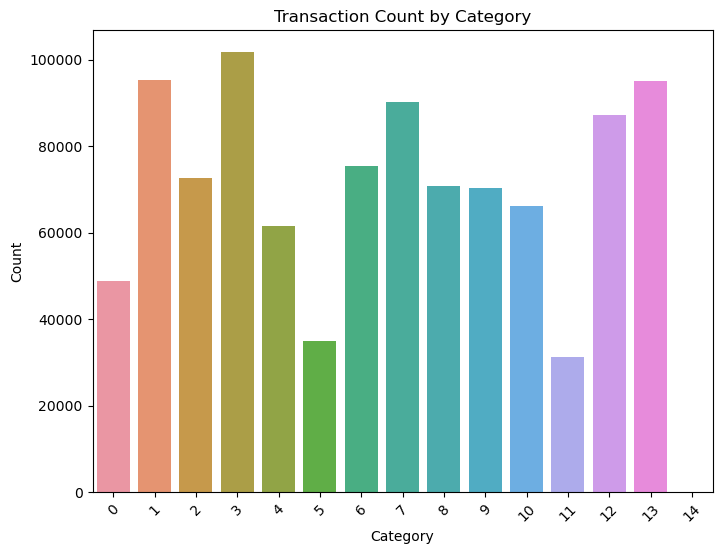

In [30]:
# Bar Chart of Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x='category')
plt.title('Transaction Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

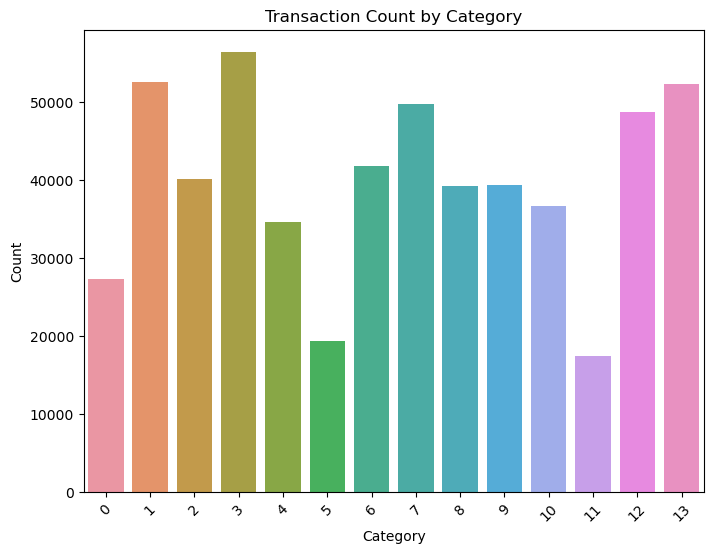

In [31]:
# Bar Chart of Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_test, x='category')
plt.title('Transaction Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

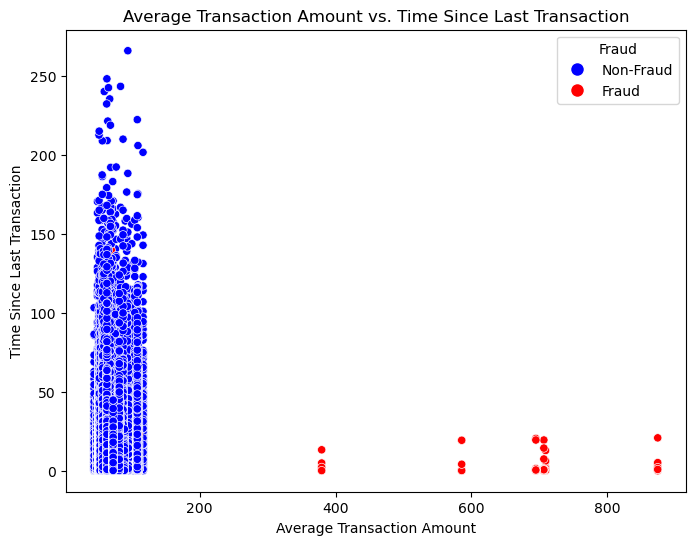

In [32]:
# Scatter Plot of Average Transaction Amount vs. Time Since Last Transaction
# Set custom color palette for Fraud and Non-Fraud classes
custom_palette = {0: 'blue', 1: 'red'}

# Plot scatter plot with custom colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_train, x='Average Transaction Amount', y='Time Since Last Transaction', hue='is_fraud', palette=custom_palette)
plt.title('Average Transaction Amount vs. Time Since Last Transaction')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Time Since Last Transaction')
# Create custom legend handles with different colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Fraud'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
plt.legend(title='Fraud', loc='upper right', handles=legend_handles)
plt.show()

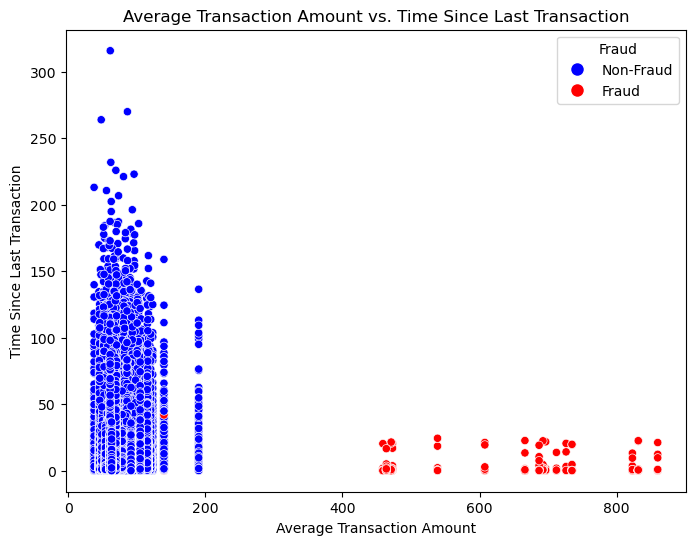

In [33]:
# Scatter Plot of Average Transaction Amount vs. Time Since Last Transaction
# Set custom color palette for Fraud and Non-Fraud classes
custom_palette = {0: 'blue', 1: 'red'}

# Plot scatter plot with custom colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_test, x='Average Transaction Amount', y='Time Since Last Transaction', hue='is_fraud', palette=custom_palette)
plt.title('Average Transaction Amount vs. Time Since Last Transaction')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Time Since Last Transaction')
# Create custom legend handles with different colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Fraud'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
plt.legend(title='Fraud', loc='upper right', handles=legend_handles)
plt.show()

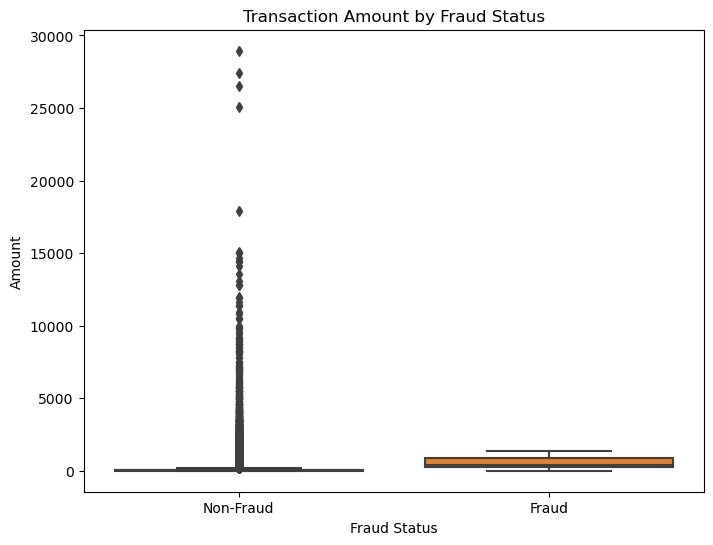

In [34]:
# Box Plot of Amount by Fraud Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_train, x='is_fraud', y='Amount')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

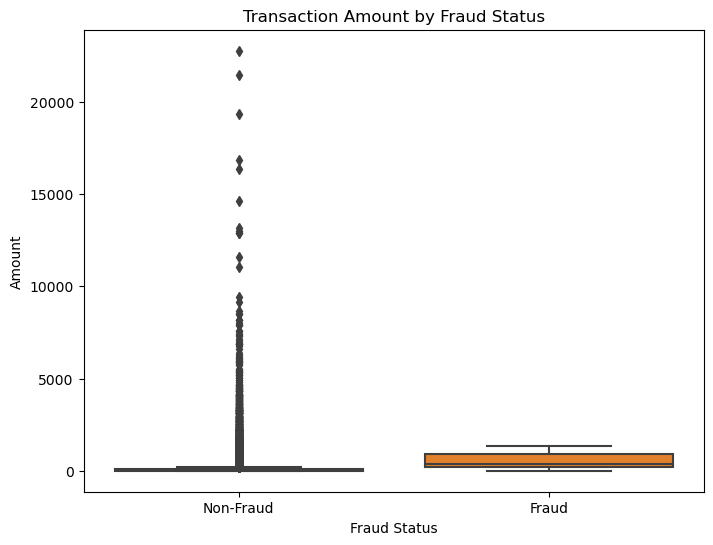

In [35]:
# Box Plot of Amount by Fraud Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_test, x='is_fraud', y='Amount')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

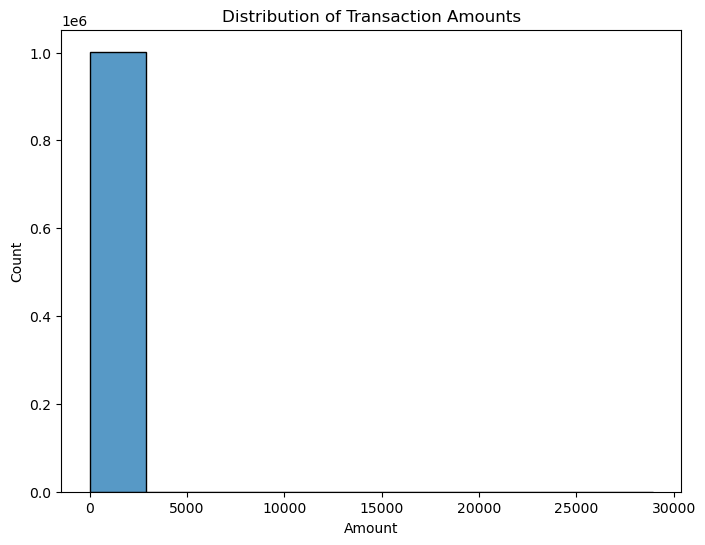

In [36]:
# Histogram of Amount
plt.figure(figsize=(8, 6))
sns.histplot(data=data_train, x='Amount', bins=10)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

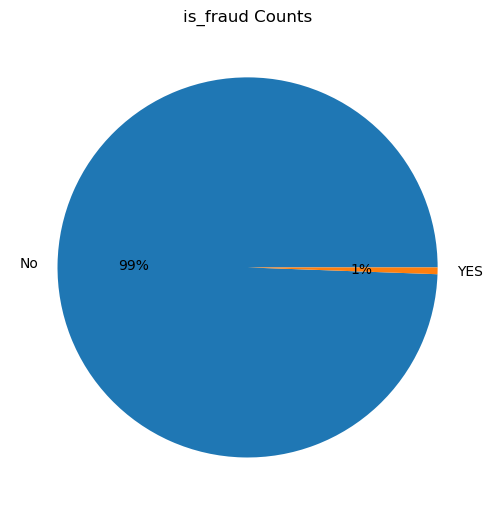

In [37]:
is_fraud = data_train["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Text(0.5, 1.0, 'Kernel Density Plot of Transaction Amount in Test Data')

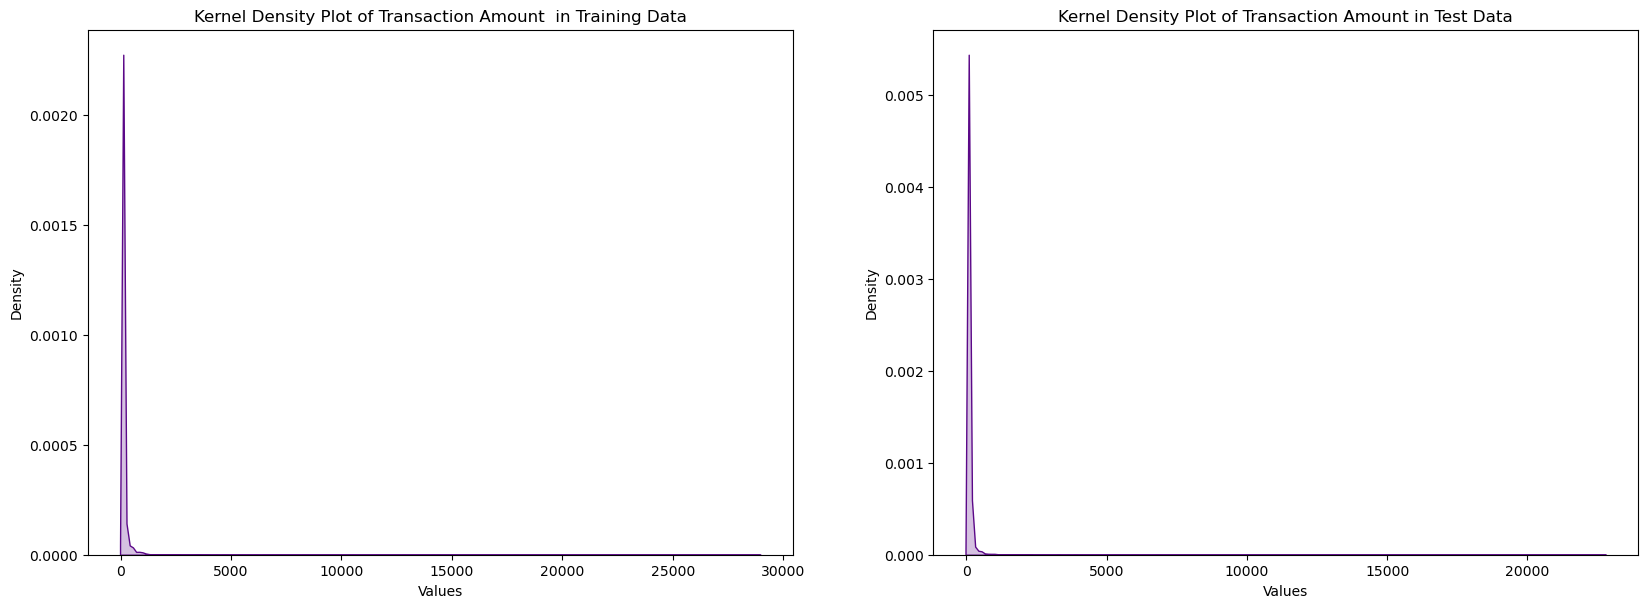

In [38]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.kdeplot(data_train['Amount'], shade=True, color="#5B0888")
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Transaction Amount  in Training Data')
plt.subplot(2, 2, 2)
sns.kdeplot(data_test['Amount'], shade=True, color="#5B0888")
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Transaction Amount in Test Data')

Text(0.5, 1.0, 'Kernel Density Plot of Average Transaction Amount  in Test Data')

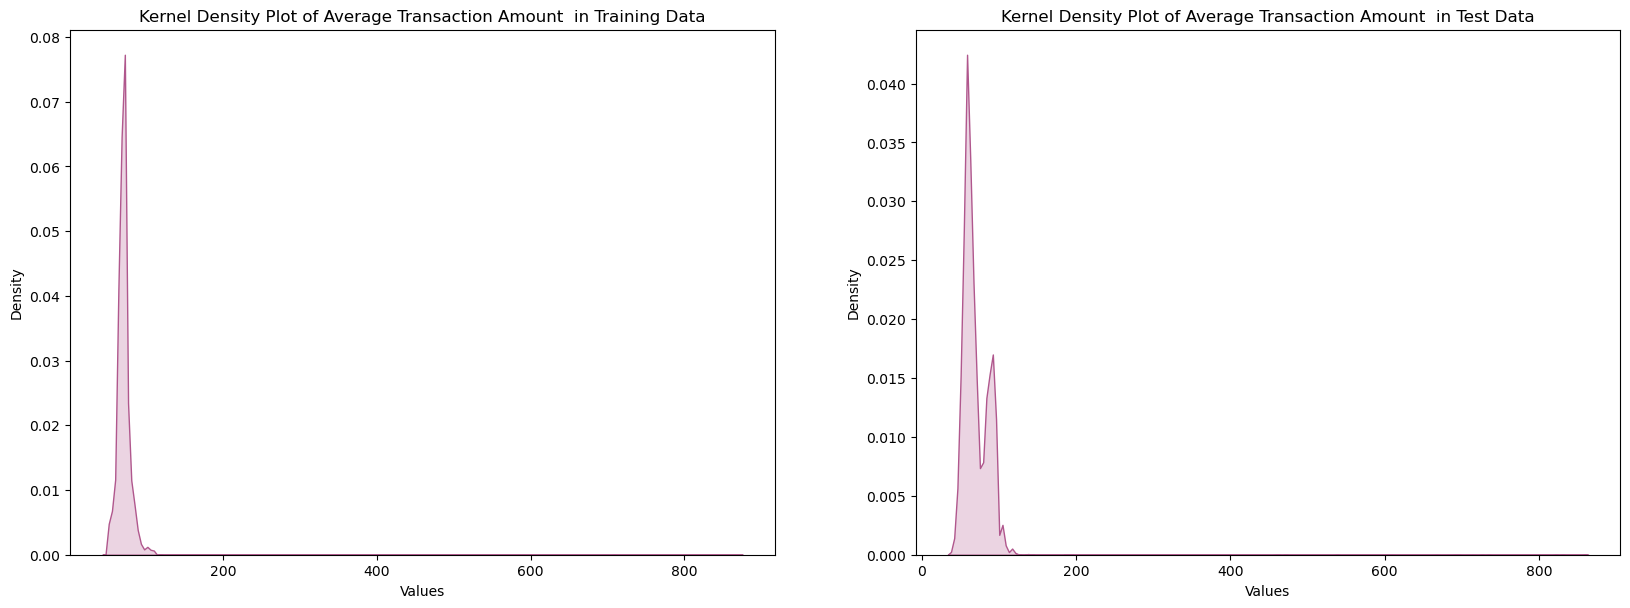

In [39]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.kdeplot(data_train['Average Transaction Amount'], shade=True, color="#B0578D")
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Average Transaction Amount  in Training Data')
plt.subplot(2, 2, 2)
sns.kdeplot(data_test['Average Transaction Amount'], shade=True, color="#B0578D")
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Average Transaction Amount  in Test Data')

Text(0.5, 1.0, 'Kernel Density Plot of Time Since Last Transaction in Test Data')

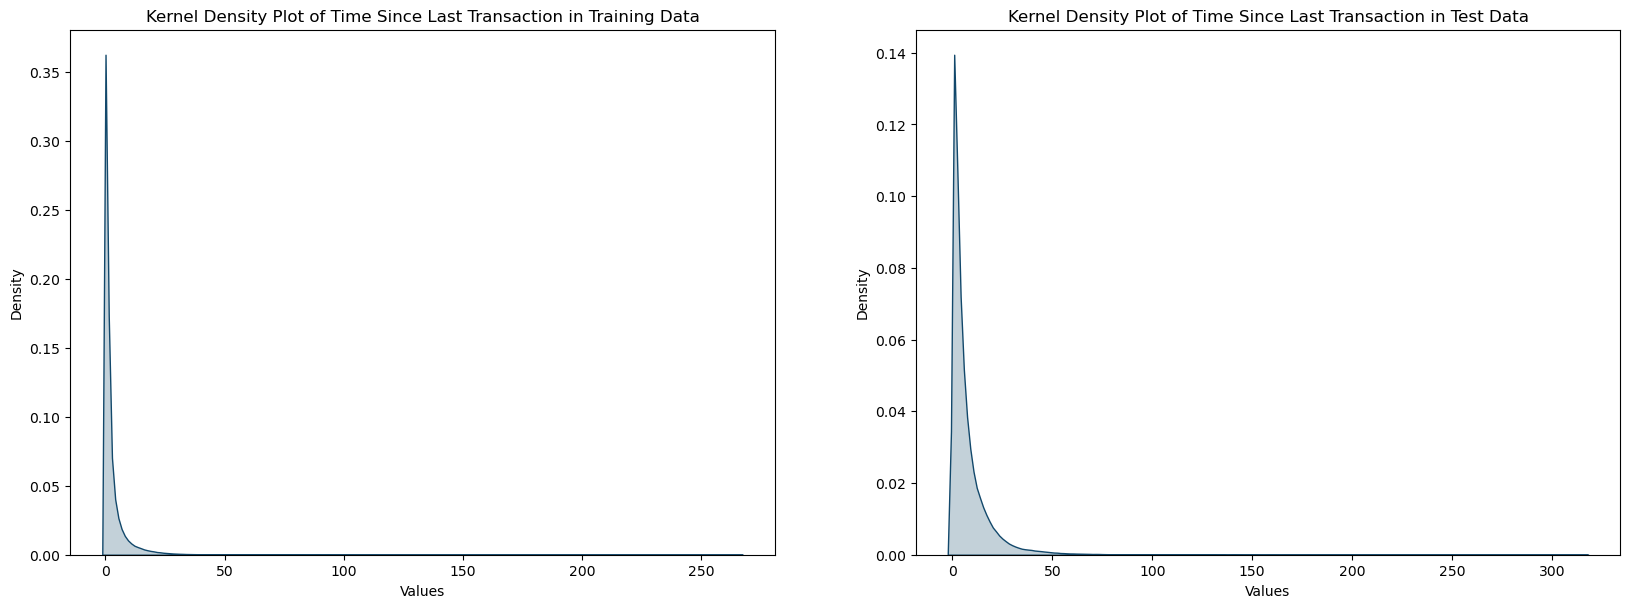

In [40]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.kdeplot(data_train['Time Since Last Transaction'], shade=True, color="#12486B")
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Time Since Last Transaction in Training Data')
plt.subplot(2, 2, 2)
sns.kdeplot(data_test['Time Since Last Transaction'], shade=True, color="#12486B")
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Time Since Last Transaction in Test Data')

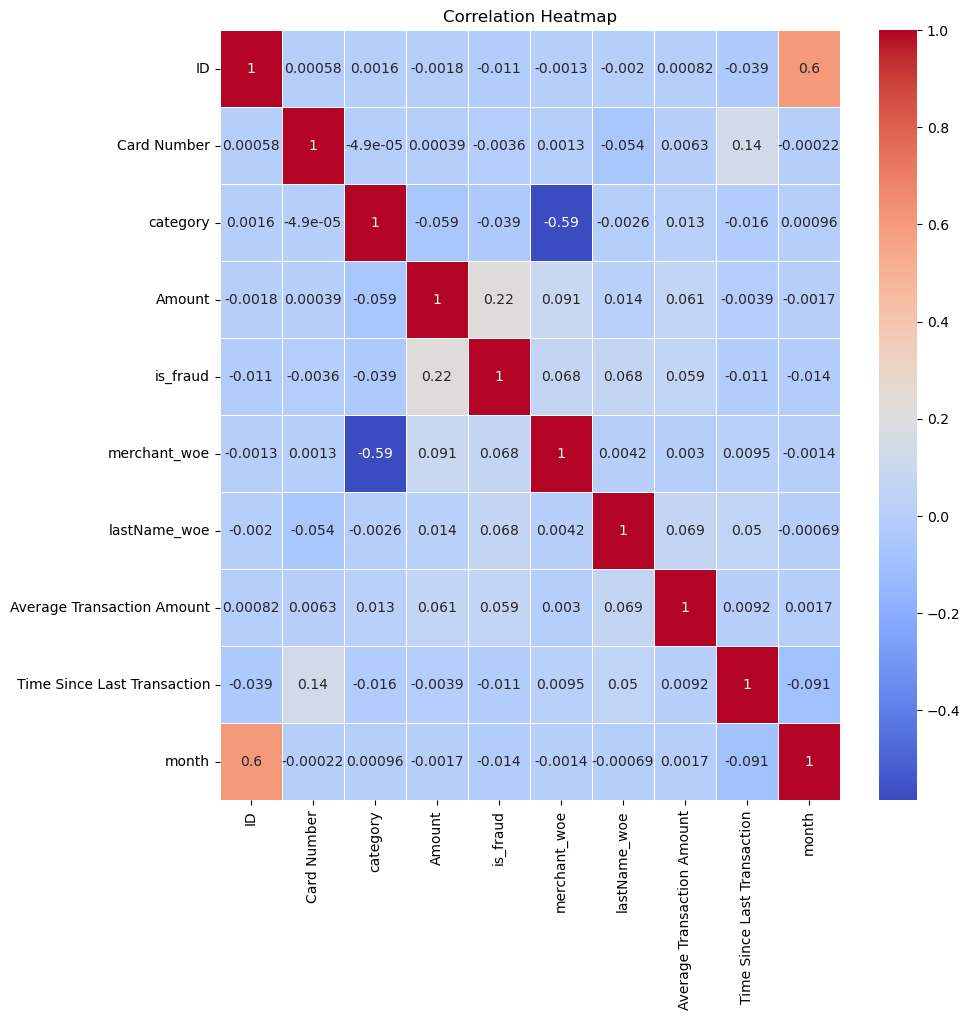

In [41]:
# Compute correlation matrix
corr_matrix = data_train.corr()

# Plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# **Check Outliers**

In [42]:
# check outliers
columns = ['Amount','Average Transaction Amount','Time Since Last Transaction']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(data_train[col], 25), np.percentile(data_train[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( data_train[col] < lower) | (data_train[col] > upper) )
    index_label = data_train[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in Amount: 51988
Number of outliers in Average Transaction Amount: 39357
Number of outliers in Time Since Last Transaction: 116031


In [43]:
# check outliers
columns = ['Amount','Average Transaction Amount','Time Since Last Transaction']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(data_test[col], 25), np.percentile(data_test[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( data_test[col] < lower) | (data_test[col] > upper) )
    index_label = data_test[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    #data_train.drop(index_label, inplace=True)

Number of outliers in Amount: 27778
Number of outliers in Average Transaction Amount: 841
Number of outliers in Time Since Last Transaction: 43613


In [44]:
#Putting "Amount" in the required range in Training Data
q1 = np.percentile(data_train['Amount'], 25)
q3 = np.percentile(data_train['Amount'], 75)
iqr = (q3 - q1) * 1.5
data_train['Amount'] = np.where(data_train['Amount'] < (q1 - iqr), q1 - iqr, data_train['Amount'])
data_train['Amount'] = np.where(data_train['Amount'] > (q3 + iqr), q3 + iqr, data_train['Amount'])

#Putting "Amount" in the required range in Test Data
q1 = np.percentile(data_test['Amount'], 25)
q3 = np.percentile(data_test['Amount'], 75)
iqr = (q3 - q1) * 1.5

data_test['Amount'] = np.where(data_test['Amount'] < (q1 - iqr), q1 - iqr, data_test['Amount'])
data_test['Amount'] = np.where(data_test['Amount'] > (q3 + iqr), q3 + iqr, data_test['Amount'])

In [45]:
#Putting "Amount" in the required range in Training Data
q1 = np.percentile(data_train['Average Transaction Amount'], 25)
q3 = np.percentile(data_train['Average Transaction Amount'], 75)
iqr = (q3 - q1) * 1.5
data_train['Average Transaction Amount'] = np.where(data_train['Average Transaction Amount'] < (q1 - iqr), q1 - iqr, data_train['Average Transaction Amount'])
data_train['Average Transaction Amount'] = np.where(data_train['Average Transaction Amount'] > (q3 + iqr), q3 + iqr, data_train['Average Transaction Amount'])

#Putting "Amount" in the required range in Test Data
q1 = np.percentile(data_test['Average Transaction Amount'], 25)
q3 = np.percentile(data_test['Average Transaction Amount'], 75)
iqr = (q3 - q1) * 1.5

data_test['Average Transaction Amount'] = np.where(data_test['Average Transaction Amount'] < (q1 - iqr), q1 - iqr, data_test['Average Transaction Amount'])
data_test['Average Transaction Amount'] = np.where(data_test['Average Transaction Amount'] > (q3 + iqr), q3 + iqr, data_test['Average Transaction Amount'])

# **Data Transformation**

In [46]:
# converting age feature in df to an array
amount = np.array(data_train['Amount'])

# making transformation using log()
amountLog = np.log(amount)

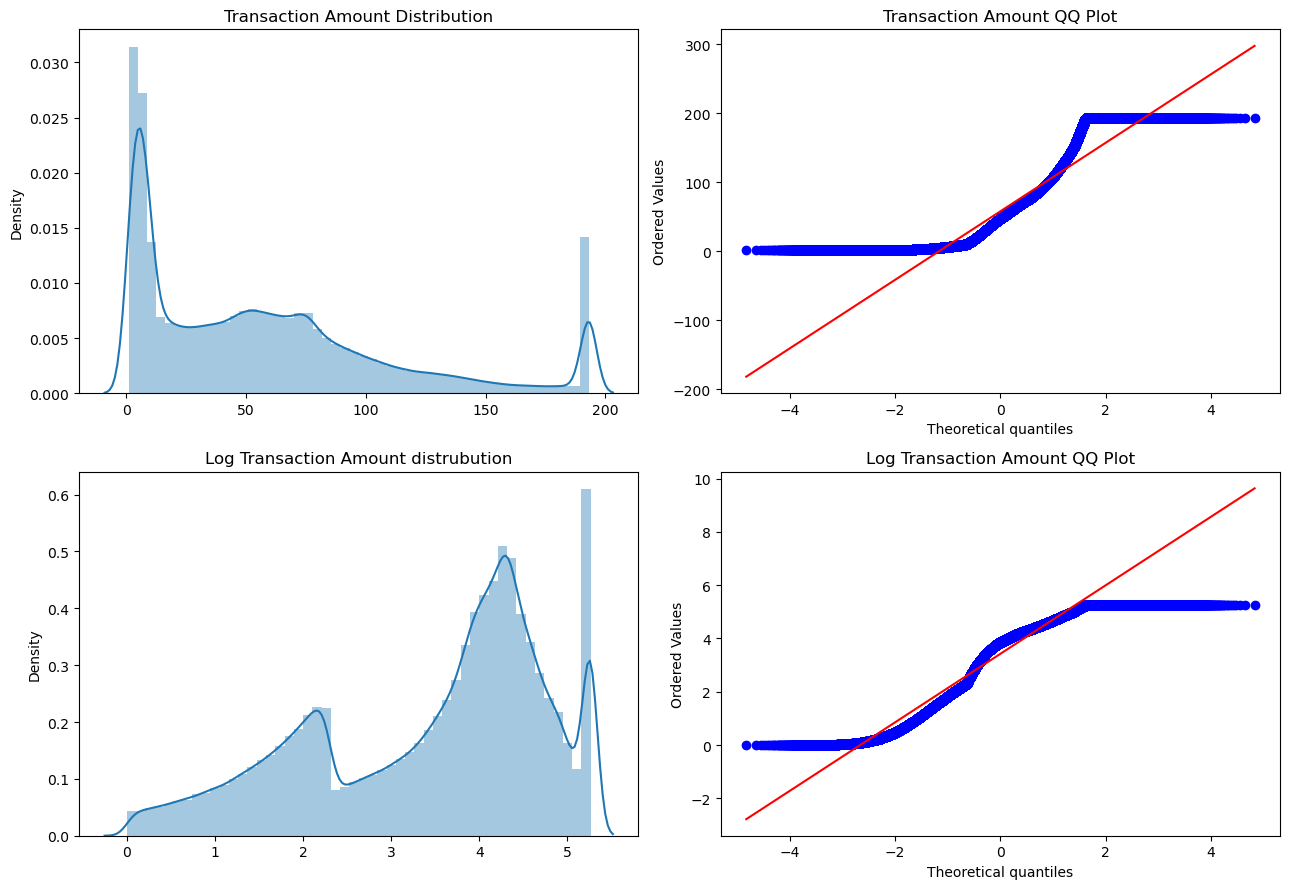

In [47]:
# Create a figure with 3 subplots
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(amount)
plt.title('Transaction Amount Distribution')

# Second subplot
plt.subplot(2, 2, 2)
stats.probplot(amount, dist="norm", plot=plt)
plt.title('Transaction Amount QQ Plot')

# Third subplot
plt.subplot(2, 2, 3)
sns.distplot(amountLog)
plt.title('Log Transaction Amount distrubution')

# fourth subplot
plt.subplot(2, 2, 4)
stats.probplot(amountLog, dist="norm", plot=plt)
plt.title('Log Transaction Amount QQ Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

In [48]:
# converting age feature in df to an array
amount = np.array(data_test['Amount'])

# making transformation using log()
amountLog = np.log(amount)

In [49]:
# Create a figure with 3 subplots
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(amount)
plt.title('Transaction Amount Distribution')

# Second subplot
plt.subplot(2, 2, 2)
stats.probplot(amount, dist="norm", plot=plt)
plt.title('Transaction Amount QQ Plot')

# Third subplot
plt.subplot(2, 2, 3)
sns.distplot(amountLog)
plt.title('Log Transaction Amount distrubution')

# fourth subplot
plt.subplot(2, 2, 4)
stats.probplot(amountLog, dist="norm", plot=plt)
plt.title('Log Transaction Amount QQ Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

In [ ]:
# converting age feature in df to an array
amount = np.array(data_train['Average Transaction Amount'])

# making transformation using log()
amountLog = np.log(amount)

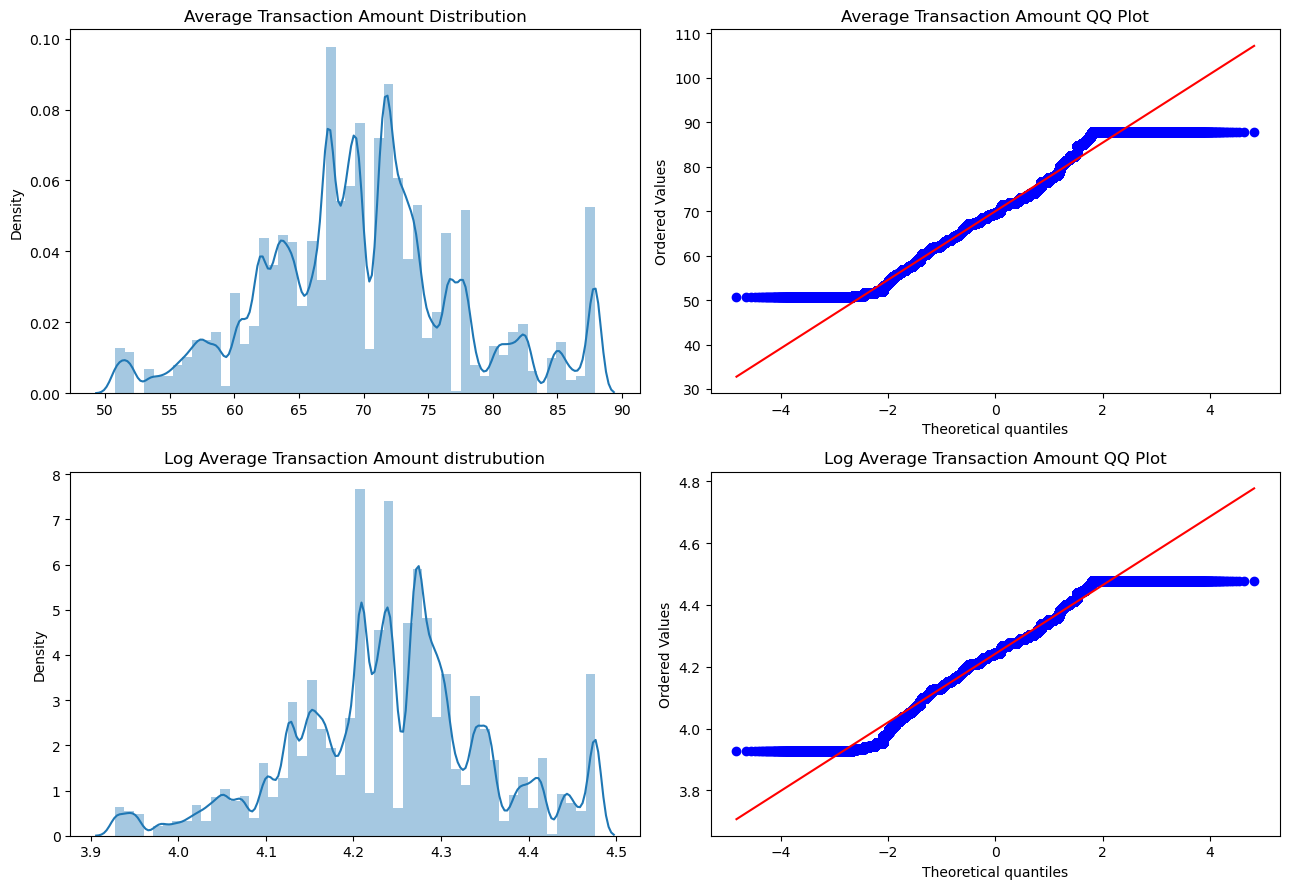

In [ ]:
# Create a figure with 3 subplots
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(amount)
plt.title('Average Transaction Amount Distribution')

# Second subplot
plt.subplot(2, 2, 2)
stats.probplot(amount, dist="norm", plot=plt)
plt.title('Average Transaction Amount QQ Plot')

# Third subplot
plt.subplot(2, 2, 3)
sns.distplot(amountLog)
plt.title('Log Average Transaction Amount distrubution')

# fourth subplot
plt.subplot(2, 2, 4)
stats.probplot(amountLog, dist="norm", plot=plt)
plt.title('Log Average Transaction Amount QQ Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

In [ ]:
# converting age feature in df to an array
amount = np.array(data_test['Average Transaction Amount'])

# making transformation using log()
amountLog = np.log(amount)

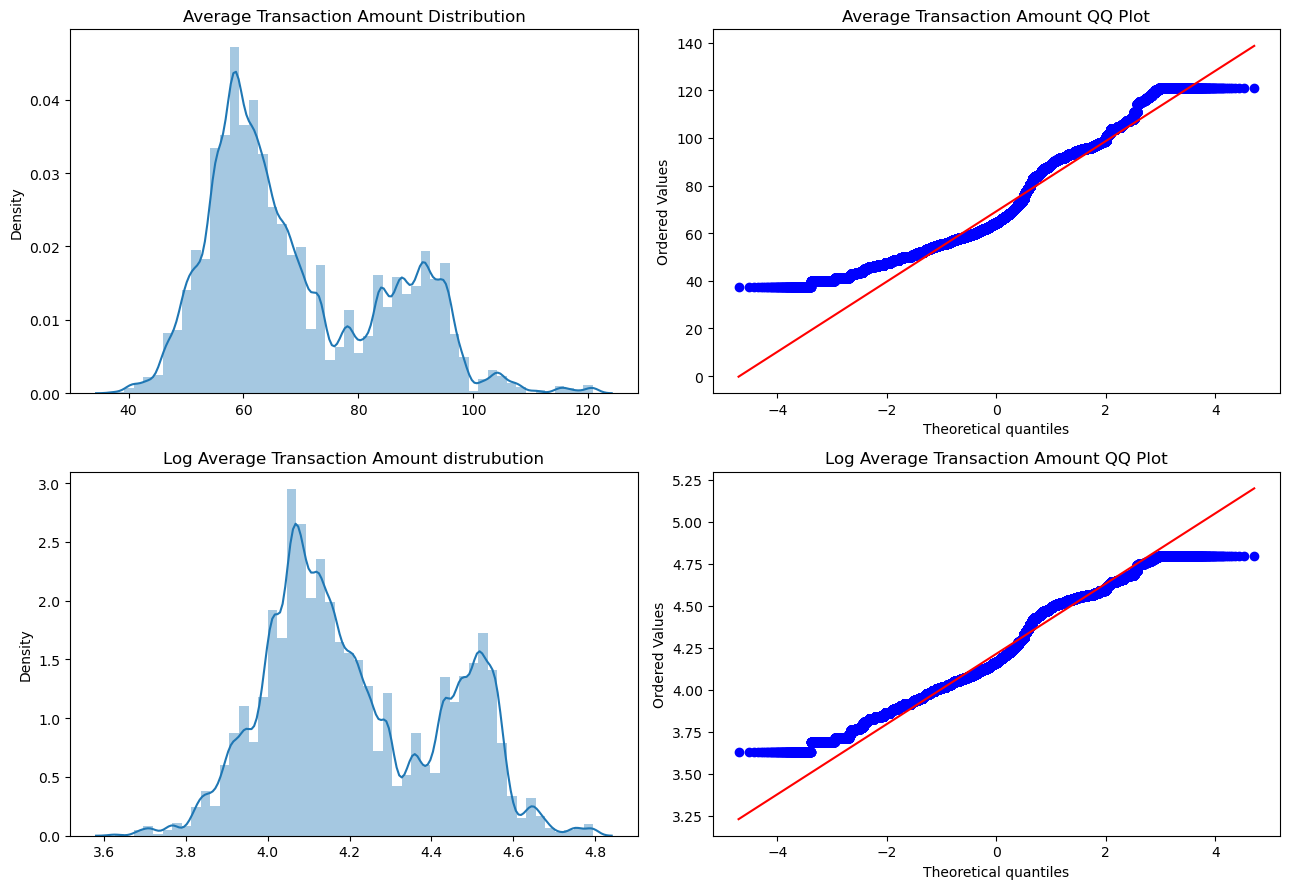

In [ ]:
# Create a figure with 3 subplots
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(amount)
plt.title('Average Transaction Amount Distribution')

# Second subplot
plt.subplot(2, 2, 2)
stats.probplot(amount, dist="norm", plot=plt)
plt.title('Average Transaction Amount QQ Plot')

# Third subplot
plt.subplot(2, 2, 3)
sns.distplot(amountLog)
plt.title('Log Average Transaction Amount distrubution')

# fourth subplot
plt.subplot(2, 2, 4)
stats.probplot(amountLog, dist="norm", plot=plt)
plt.title('Log Average Transaction Amount QQ Plot')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

# **Data Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling data in range of 0 to 1
scaler = MinMaxScaler()
#data_train["Card Number"]= scaler.fit_transform(data_train[["Card Number"]])
data_train["Amount"]= scaler.fit_transform(data_train[["Amount"]])
data_train['Average Transaction Amount']= scaler.fit_transform(data_train[["Average Transaction Amount"]])

#data_test["Card Number"]= scaler.fit_transform(data_test[["Card Number"]])
data_test["Amount"]= scaler.fit_transform(data_test[["Amount"]])
data_test["Average Transaction Amount"]= scaler.fit_transform(data_test[["Average Transaction Amount"]])

# ***Resample Target***

In [ ]:
from sklearn.utils import resample
# Resample the majority class in the training data
No_class_train = data_train[data_train["is_fraud"] == 0]
yes_class_train = data_train[data_train["is_fraud"] == 1]
No_class_train = resample(No_class_train, replace=False, n_samples=len(yes_class_train))
down_samples_train = pd.concat([yes_class_train, No_class_train], axis=0)

# Resample the majority class in the test data
No_class_test = data_test[data_test["is_fraud"] == 0]
yes_class_test = data_test[data_test["is_fraud"] == 1]
No_class_test = resample(No_class_test, replace=False, n_samples=len(yes_class_test))
down_samples_test = pd.concat([yes_class_test, No_class_test], axis=0)

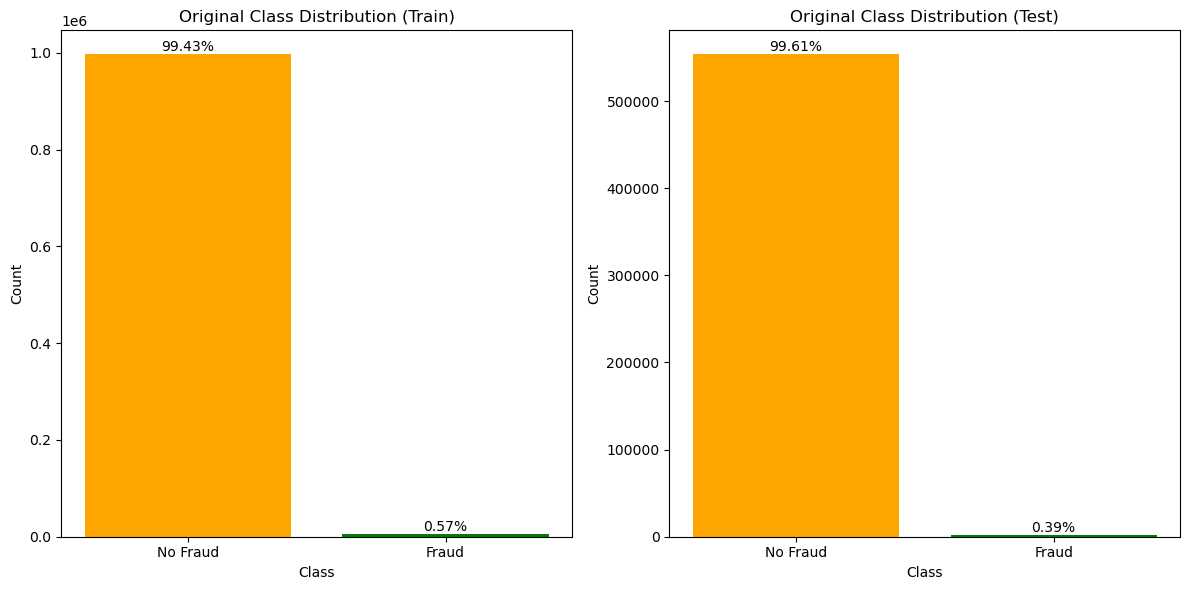

In [ ]:
# Count the occurrences of each class in the original dataset
original_class_counts_train = data_train["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts_train = down_samples_train["is_fraud"].value_counts()

# Calculate the percentage of each class in the original dataset
original_percentages_train = original_class_counts_train / len(data_train) * 100

# Calculate the percentage of each class in the downsampled dataset
downsampled_percentages_train = downsampled_class_counts_train / len(down_samples_train) * 100

# Plotting
plt.figure(figsize=(12, 6))
# Bar chart for original class distribution in train data
plt.subplot(1, 2, 1)
bars_1_train = plt.bar(original_class_counts_train.index, original_class_counts_train.values, color=['orange', 'green'])
for bar, label in zip(bars_1_train, original_percentages_train):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution (Train)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts_train.index, ['No Fraud', 'Fraud'])

# Count the occurrences of each class in the original test dataset
original_class_counts_test = data_test["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled test dataset
downsampled_class_counts_test = down_samples_test["is_fraud"].value_counts()

# Calculate the percentage of each class in the original test dataset
original_percentages_test = original_class_counts_test / len(data_test) * 100

# Calculate the percentage of each class in the downsampled test dataset
downsampled_percentages_test = downsampled_class_counts_test / len(down_samples_test) * 100

# Bar chart for original class distribution in test data
plt.subplot(1, 2, 2)
bars_1_test = plt.bar(original_class_counts_test.index, original_class_counts_test.values, color=['orange', 'green'])
for bar, label in zip(bars_1_test, original_percentages_test):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution (Test)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts_test.index, ['No Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


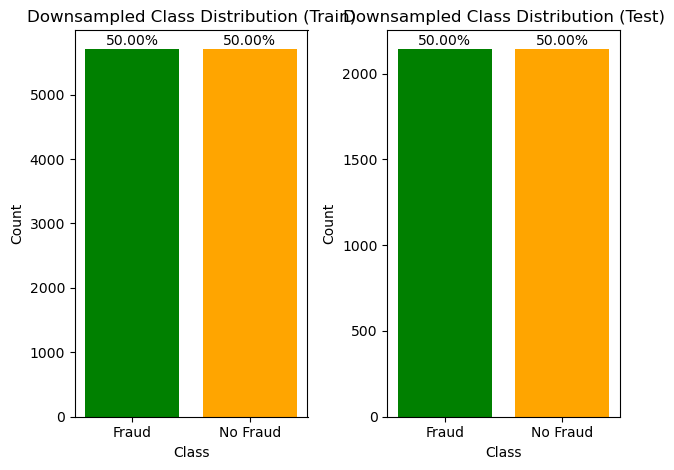

In [ ]:
# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts_train = down_samples_train["is_fraud"].value_counts()

# Calculate the percentage of each class in the downsampled dataset
downsampled_percentages_train = downsampled_class_counts_train / len(down_samples_train) * 100

# Bar chart for downsampled class distribution in train data
plt.subplot(1, 2, 1)
bars_2_train = plt.bar(downsampled_class_counts_train.index, downsampled_class_counts_train.values, color=['orange', 'green'])
for bar, label in zip(bars_2_train, downsampled_percentages_train):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution (Train)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts_train.index, ['No Fraud', 'Fraud'])

# Count the occurrences of each class in the downsampled test dataset
downsampled_class_counts_test = down_samples_test["is_fraud"].value_counts()

# Calculate the percentage of each class in the downsampled test dataset
downsampled_percentages_test = downsampled_class_counts_test / len(down_samples_test) * 100

# Bar chart for downsampled class distribution in test data
plt.subplot(1, 2, 2)
bars_2_test = plt.bar(downsampled_class_counts_test.index, downsampled_class_counts_test.values, color=['orange', 'green'])
for bar, label in zip(bars_2_test, downsampled_percentages_test):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution (Test)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts_test.index, ['No Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


In [ ]:
down_samples_train.columns

Index(['ID', 'Time', 'Card Number', 'merchant', 'category', 'Amount',
       'firstName', 'lastName', 'trans_num', 'is_fraud', 'merchant_woe',
       'lastName_woe', 'Average Transaction Amount',
       'Time Since Last Transaction', 'month'],
      dtype='object')

In [ ]:
down_samples_test.columns

Index(['ID', 'Time', 'Card Number', 'merchant', 'category', 'Amount',
       'firstName', 'lastName', 'trans_num', 'is_fraud', 'merchant_woe',
       'lastName_woe', 'Average Transaction Amount',
       'Time Since Last Transaction', 'month'],
      dtype='object')

# **Drop Unnessery columns**

In [ ]:
saved_data=down_samples_train.drop(columns=['ID', 'Time','firstName','trans_num'])
down_samples_train=down_samples_train.drop(columns=['ID', 'Time', 'Card Number', 'merchant','firstName', 'lastName', 'trans_num'])
down_samples_test=down_samples_test.drop(columns=['ID', 'Time', 'Card Number', 'merchant','firstName', 'lastName', 'trans_num'])

In [ ]:
down_samples_test.columns

Index(['category', 'Amount', 'is_fraud', 'merchant_woe', 'lastName_woe',
       'Average Transaction Amount', 'Time Since Last Transaction', 'month'],
      dtype='object')

# **Model Building**

In [ ]:
# Define features and target variables for both train and test datasets
X_train = down_samples_train.drop("is_fraud", axis=1)
y_train = down_samples_train["is_fraud"]
X_test = data_test.drop("is_fraud", axis=1)
y_test = data_test["is_fraud"]

## **Logistic Regression Model**

In [ ]:
#Loogistic Regression Model with HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization parameter

# Create a logistic regression model
LR_model = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=5)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_LR_model = grid_search.best_estimator_

# Make predictions on the test set
predict_LR_tuned = best_LR_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_LR_tuned))
LR_accuracy_tuned = accuracy_score(predict_LR_tuned, y_test)
print('Tuned Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy_tuned * 100))


Best Hyperparameters: {'C': 10}
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2145
           1       0.86      0.82      0.84      2145

    accuracy                           0.84      4290
   macro avg       0.84      0.84      0.84      4290
weighted avg       0.84      0.84      0.84      4290

Tuned Logistic Regression accuracy is: 84.34%


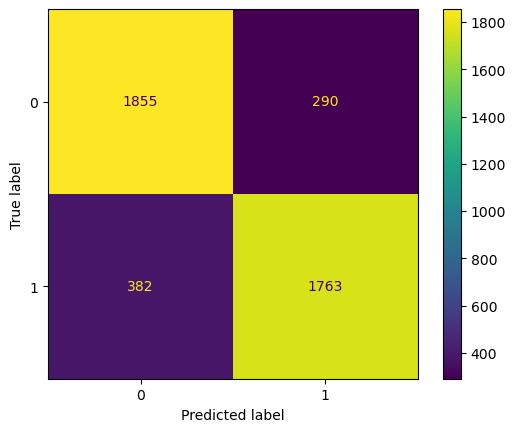

In [ ]:
#Confusion metrix
from sklearn import metrics
cm=confusion_matrix(y_test,predict_LR_tuned)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## **KNN Model**

In [ ]:
#KNN model
wss=[]
for k in range (2,36,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train)
    s=knn.score(X_test, y_test)
    wss.append(s)

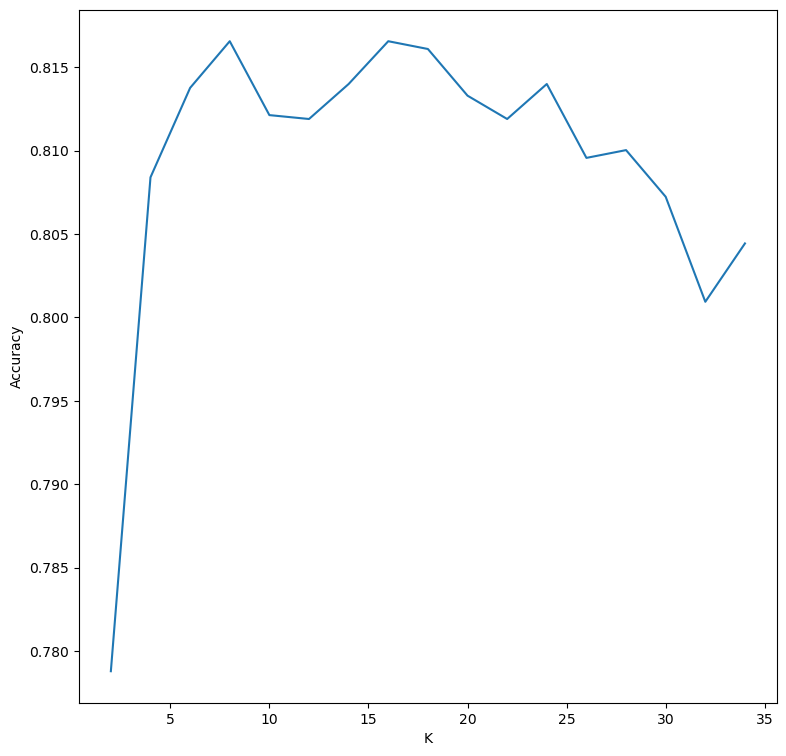

In [ ]:
#KNN model
plt.figure(figsize=(9,9))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(2,36,2),wss)

In [ ]:
#KNN model with HyperParameter Tuning

from sklearn.metrics import accuracy_score

# Initialize KNN classifier with the chosen number of neighbors
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predict_knn_test = knn.predict(X_test)

# Calculate the accuracy score on the test data
test_accuracy = accuracy_score(predict_knn_test, y_test)
print("KNN Test Accuracy:", test_accuracy * 100)

KNN Test Accuracy: 81.32867132867133


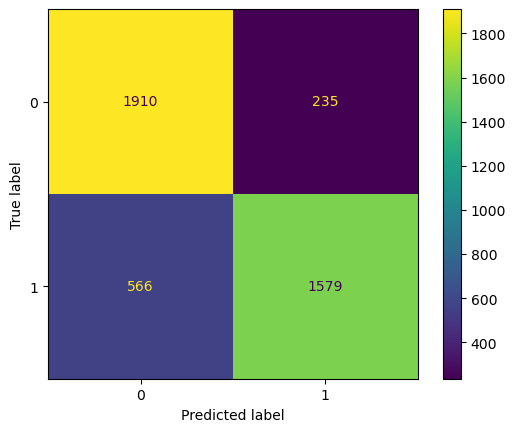

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,predict_knn_test)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## **Decision Tree Model**

In [ ]:
#Decision Tree Model with HyperParameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree classifier
DT_model = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_DT_model = grid_search.best_estimator_

# Make predictions on the test set
predict_DT_tuned = best_DT_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_DT_tuned))
DT_accuracy_tuned = accuracy_score(predict_DT_tuned, y_test)
print('Tuned Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy_tuned * 100))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2145
           1       0.95      0.97      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      0.96      0.96      4290
weighted avg       0.96      0.96      0.96      4290

Tuned Decision Tree model accuracy is: 95.83%


In [ ]:
#Decisin Tree model with HyperParameter Tuning
acc1=[]
acc2=[]
for i in range (2,16):
    dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dtc1.fit(X_train,y_train)
    dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dtc2.fit(X_train,y_train)
    acc1.append(dtc1.score(X_test, y_test))
    acc2.append(dtc2.score(X_test, y_test))

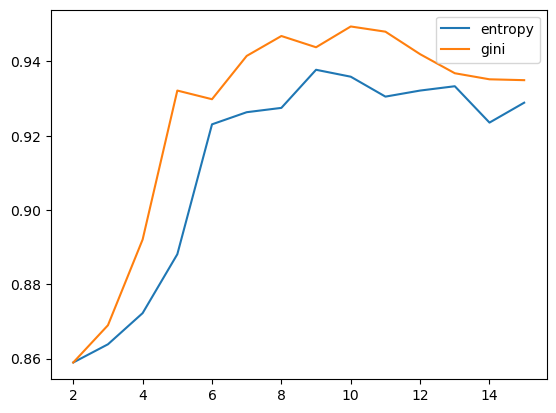

In [ ]:
#Decision Tree Model
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()

In [ ]:
#Decision Tree Model with HyperParameter Tuning
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 8 , random_state = 42)
clf = clf.fit(X_train , y_train)
y_pred_test = clf.predict(X_test)

y_pred_train = clf.predict(X_train)
y_pred_train

print ('Decision_Tree Accuracy_Train: {0:0.4f}'. format (accuracy_score(y_train,y_pred_train)*100))
print ('Decision_Tree Accuracy_Test: {0:0.4f}'. format (accuracy_score(y_pred_test,y_test)*100))

Decision_Tree Accuracy_Train: 95.7991
Decision_Tree Accuracy_Test: 94.6853


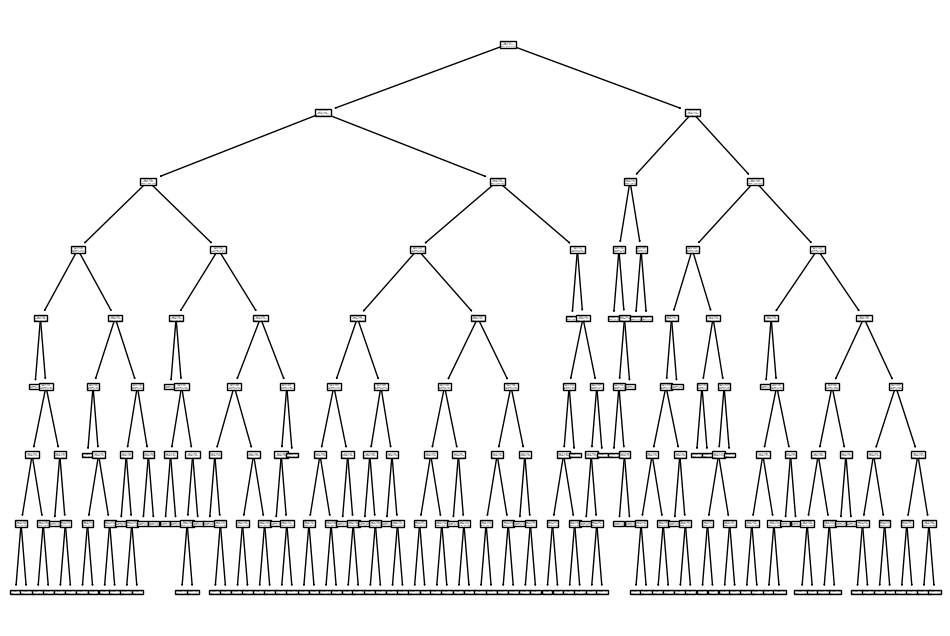

In [ ]:
#Decision Tree Model
from sklearn import tree
plt.figure (figsize=(12,8))
tree.plot_tree (clf.fit(X_train , y_train))
plt.show()

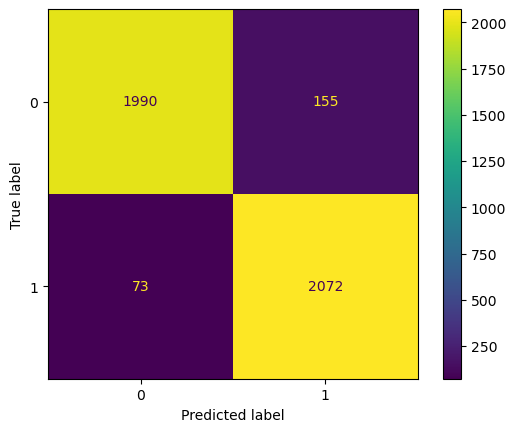

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,y_pred_test)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## **Random Forest Model**

In [ ]:
#Random Forest Model without HyperParameter Tuning
RF = RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2145
           1       0.96      0.93      0.95      2145

    accuracy                           0.95      4290
   macro avg       0.95      0.95      0.95      4290
weighted avg       0.95      0.95      0.95      4290

Random Forest model accuracy is: 94.69%


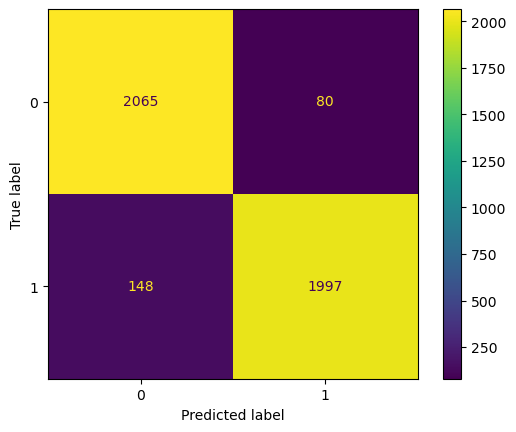

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,predict_RF)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## **Linear SVM Model**

In [ ]:
#Linear SVM Model without HyperParameter Tuning
from sklearn.calibration import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2145
           1       0.88      0.80      0.84      2145

    accuracy                           0.84      4290
   macro avg       0.85      0.84      0.84      4290
weighted avg       0.85      0.84      0.84      4290

SVC model accuracy is: 84.43%


In [ ]:
#Linear SVM Model with HyperParameter Tuning

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  # Regularization parameter

# Create a LinearSVC model
svm_model = LinearSVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
predict_svm_tuned = best_svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_svm_tuned))
svm_accuracy_tuned = accuracy_score(predict_svm_tuned, y_test)
print('Tuned SVC model accuracy is: {:.2f}%'.format(svm_accuracy_tuned * 100))


Best Hyperparameters: {'C': 1}
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2145
           1       0.88      0.80      0.84      2145

    accuracy                           0.84      4290
   macro avg       0.85      0.84      0.84      4290
weighted avg       0.85      0.84      0.84      4290

Tuned SVC model accuracy is: 84.38%


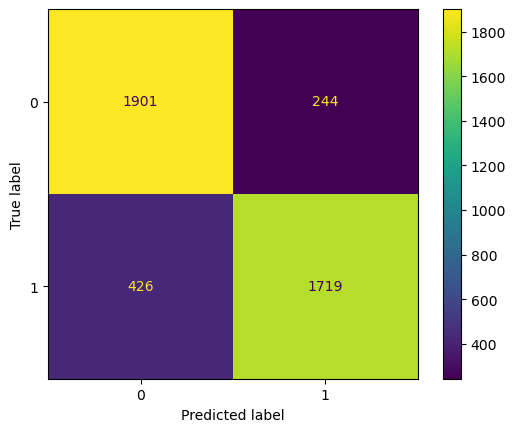

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,predict_svm_tuned)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## **XGB Model**

In [ ]:
#XGB Classifier Model  without HyperParameter Tuning
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2145
           1       0.96      0.97      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      0.96      0.96      4290
weighted avg       0.96      0.96      0.96      4290

XGBoost model accuracy is: 96.34%


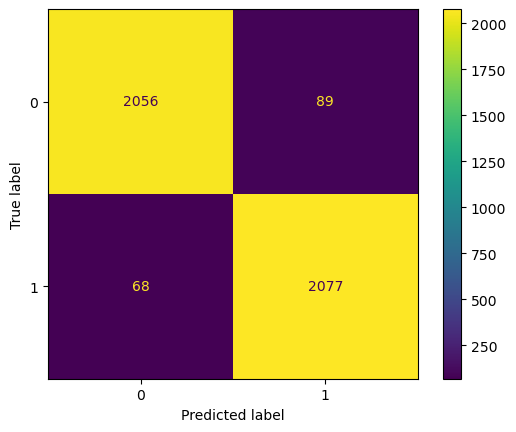

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,predict_XGB)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
#XGB Classifier Model  with HyperParameter Tuning

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBoost classifier
XGBB = XGBClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=XGBB, param_grid=param_grid, cv=5)

# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_XGB_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predict_XGB_tuned = best_XGB_model.predict(X_test)

# Evaluate the tuned model
print(classification_report(y_test, predict_XGB_tuned))
XGB_accuracy_tuned = accuracy_score(predict_XGB_tuned, y_test)
print('Tuned XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy_tuned * 100))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2145
           1       0.96      0.97      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      0.96      0.96      4290
weighted avg       0.96      0.96      0.96      4290

Tuned XGBoost model accuracy is: 96.36%


## **Gaussian Naive Bayes Model**

In [ ]:
# Gaussian Naive Bayes Model  without HyperParameter Tuning
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive = NB_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_naive))
GaussianNB_accuracy = accuracy_score(y_pred_naive, y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(GaussianNB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2145
           1       0.83      0.77      0.80      2145

    accuracy                           0.81      4290
   macro avg       0.81      0.81      0.81      4290
weighted avg       0.81      0.81      0.81      4290

Naive Bayes model accuracy is: 81.00%


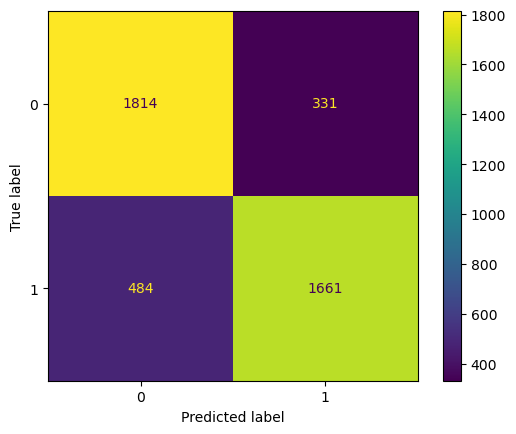

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,y_pred_naive)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

# **Accuracy Conclusion**

In [ ]:
#creating a dataframe to compare between the accuracy of each model
'''
model = ['XGBClassifier', 'GaussianNB_Classifier', 'RandomForest', 'Decision Tree', 'Logistic Regression', 'SVC', 'KNN']
accuracy = [XGB_accuracy_tuned * 100, GaussianNB_accuracy * 100, RF_accuracy * 100, accuracy_score(y_pred_test,y_test)*100,LR_accuracy_tuned * 100, svm_accuracy_tuned * 100, test_accuracy*100]

The_Table = pd.DataFrame({'Model': model, 'Accuracy': accuracy})
Sorted_Table = The_Table.sort_values(by='Accuracy', ascending=False)

Sorted_Table
'''

,Model,Accuracy
0,XGBClassifier,96.503497
2,RandomForest,94.428904
3,Decision Tree,94.358974
4,Logistic Regression,84.592075
5,SVC,83.030303
1,GaussianNB_Classifier,80.163170
6,KNN,76.526807


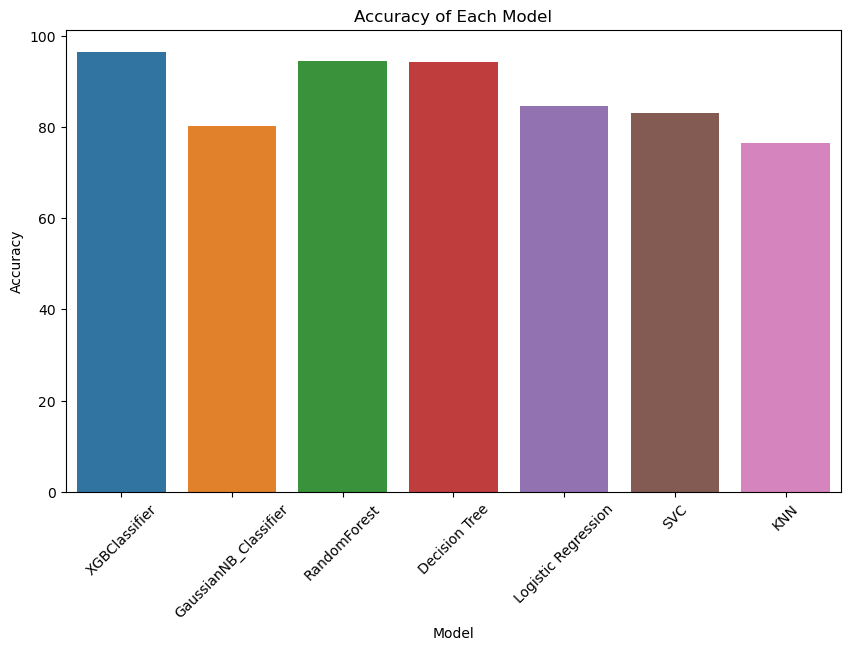

In [ ]:
#visualizing the accuracy of each model
'''
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the barplot
sns.barplot(x='Model', y='Accuracy', data=The_Table)

# Add title and labels
plt.title('Accuracy of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()
'''

In [ ]:
#creating a dataframe to compare between the accuracy of each model
model = ['XGBClassifier', 'GaussianNB_Classifier', 'RandomForest', 'Decision Tree', 'Logistic Regression', 'SVC', 'KNN']
accuracy = [XGB_accuracy_tuned * 100, GaussianNB_accuracy * 100, RF_accuracy * 100, accuracy_score(y_pred_test,y_test)*100,LR_accuracy_tuned * 100, svm_accuracy_tuned * 100, test_accuracy*100]

The_Table = pd.DataFrame({'Model': model, 'Accuracy': accuracy})
Sorted_Table = The_Table.sort_values(by='Accuracy', ascending=False)

Sorted_Table

,Model,Accuracy
0,XGBClassifier,96.363636
2,RandomForest,94.685315
3,Decision Tree,94.685315
5,SVC,84.382284
4,Logistic Regression,84.335664
6,KNN,81.328671
1,GaussianNB_Classifier,81.002331


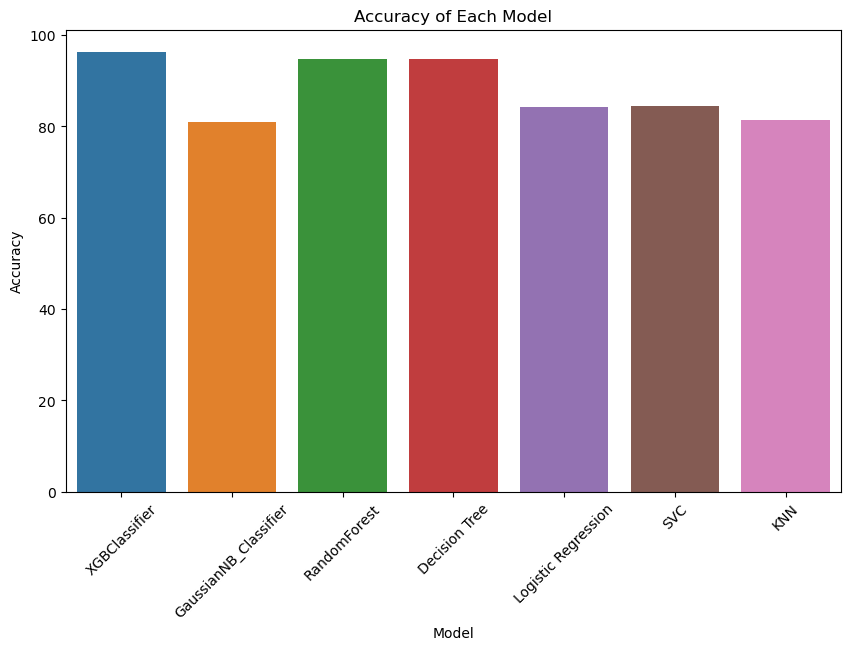

In [ ]:
#visualizing the accuracy of each model
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create the barplot
sns.barplot(x='Model', y='Accuracy', data=The_Table)

# Add title and labels
plt.title('Accuracy of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

# **Save Model**

In [ ]:
import joblib

joblib_file="Fraud_Detection_XGB"
joblib.dump(XGB,joblib_file)

In [ ]:
joblib_file="DT_model"
joblib.dump(clf,joblib_file)

['DT_model']

In [ ]:
joblib_file="XG_model"
joblib.dump(XGB,joblib_file)

['XG_model']

In [ ]:
joblib_file="KNN_model"
joblib.dump(knn,joblib_file)

['KNN_model']

In [ ]:
joblib_file="NB_model"
joblib.dump(NB_model,joblib_file)

['NB_model']

In [ ]:
joblib_file="LR_model"
joblib.dump(grid_search,joblib_file)

['LR_model']

In [ ]:
joblib_file="RF_model"
joblib.dump(RF,joblib_file)

['RF_model']

In [ ]:
joblib_file="SVM_model"
joblib.dump(grid_search,joblib_file)

['SVM_model']

In [ ]:
# Save DataFrame to CSV file
saved_data.to_csv('Data.csv', index=False)

In [ ]:
X_test

,category,Amount,merchant_woe,lastName_woe,Average Transaction Amount,Time Since Last Transaction,month
253809,1,1.000000,0.012808,0.008010,0.651777,2.409444,9
253900,1,1.000000,0.012104,0.008010,0.651777,0.848611,9
256535,6,1.000000,0.016336,0.008010,0.651777,20.608889,9
256612,6,1.000000,0.010193,0.008010,0.651777,0.513889,9
256714,6,1.000000,0.008600,0.008010,0.651777,0.628333,9
...,...,...,...,...,...,...,...
397523,7,0.097980,0.002846,0.006623,0.295965,2.130833,11
549412,4,1.000000,0.002981,0.006785,0.634592,0.710556,12
397276,1,0.455748,0.012104,0.007446,0.282744,12.735833,11
248044,4,0.004738,0.000000,0.000000,0.300472,9.607222,9


In [ ]:
X_train

,category,Amount,merchant_woe,lastName_woe,Average Transaction Amount,Time Since Last Transaction,month
102490,3,0.063339,0.004496,0.007550,0.177556,6.400000,3
102556,3,0.055897,0.004995,0.007550,0.177556,1.166667,3
104145,9,0.094514,0.001399,0.007550,0.177556,20.400000,3
106627,7,1.000000,0.009201,0.007550,0.177556,23.066667,3
106628,13,1.000000,0.003183,0.007550,0.177556,0.000000,3
...,...,...,...,...,...,...,...
623490,1,0.610492,0.014965,0.006660,0.373035,1.783333,9
93179,9,0.417092,0.001359,0.005828,0.794548,0.750000,2
580909,13,0.339284,0.003183,0.006447,0.499661,0.933333,9
547325,8,0.072499,0.001391,0.005542,0.608015,0.033333,8


In [ ]:
down_samples_test

,category,Amount,is_fraud,merchant_woe,lastName_woe,Average Transaction Amount,Time Since Last Transaction,month
253809,1,1.000000,1,0.012808,0.008010,0.651777,2.409444,9
253900,1,1.000000,1,0.012104,0.008010,0.651777,0.848611,9
256535,6,1.000000,1,0.016336,0.008010,0.651777,20.608889,9
256612,6,1.000000,1,0.010193,0.008010,0.651777,0.513889,9
256714,6,1.000000,1,0.008600,0.008010,0.651777,0.628333,9
...,...,...,...,...,...,...,...,...
397523,7,0.097980,0,0.002846,0.006623,0.295965,2.130833,11
549412,4,1.000000,0,0.002981,0.006785,0.634592,0.710556,12
397276,1,0.455748,0,0.012104,0.007446,0.282744,12.735833,11
248044,4,0.004738,0,0.000000,0.000000,0.300472,9.607222,9


In [ ]:
'''
from sklearn.impute import SimpleImputer


            # Create an imputer object with a chosen strategy
            imputer = SimpleImputer(strategy='mean')

            # Fit the imputer on the data and transform the data
            sample1_imputed = imputer.fit_transform(sample1)

            # Now pass the imputed data to the model
            pred_Y1 = loaded_model_RF.predict(sample1_imputed)
'''